# TP5 - Visualisation sous `Python`

#### Analyse de Données Massives - Master 1ère année

Dans ce TP, nous allons utiliser le package [`seaborn`](https://seaborn.pydata.org), ainsi que le jeu de données [`tips`](tips.csv), vu dans le TP précédent

In [1]:
import numpy
import pandas
tips = pandas.read_csv("tips.csv", header = 0, sep = ",")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## `seaborn`

Ce module, importé ci-dessous, est basé sur `matplotlib`. Il faut donc ajouter la ligne `%matplotlib inline` dans un *notebook*, pour pouvoir voir les graphiques.

Ce module contient toutes les fonctions directement, l'importation est donc assez simple.

In [2]:
import seaborn

%matplotlib inline

### Variable quantitative

La fonction `distplot()` nous permet de réaliser les graphiques de distribution d'une variable quantitative. Par défaut, elle réaliser un histogramme avec une estimation de la densité.

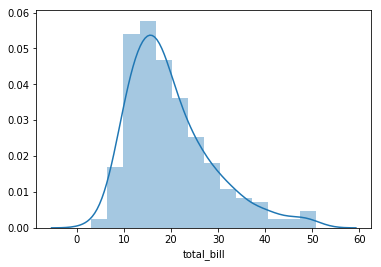

In [3]:
seaborn.distplot(tips.total_bill)

Pour ne garder que l'histogramme, on indique qu'on ne souhaite pas l'estimation de la densité (paramètre `kde`). Ainsi, l'histogramme devient en effectifs.

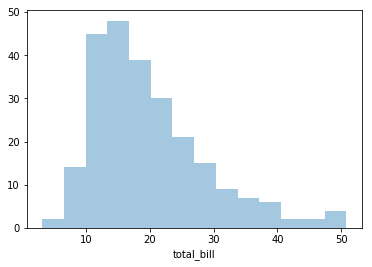

In [4]:
seaborn.distplot(tips.total_bill, kde = False)

De même, on ne peut vouloir que la densité. Auquel cas, on supprimer l'histogramme avec le paramètre `hist`.

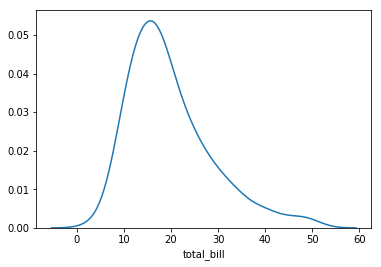

In [5]:
seaborn.distplot(tips.total_bill, hist = False)

Il est possible de choisir le nombre de bins, avec le paramètre `bins`.

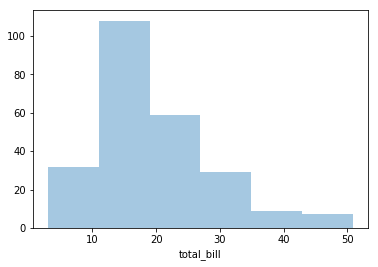

In [6]:
seaborn.distplot(tips.total_bill, bins = 6, kde = False)

Il est aussi possible de choisir les limites des intervalles, avec le même paramètre `bins`. Dans ce cas, il faut bien évidemment veiller à faire un histogramme en densité. Si on ne souhaite pas avoir l'estimation de la densité, on peut l'obtenir tout de même avec le paramètre `norm_hist`.

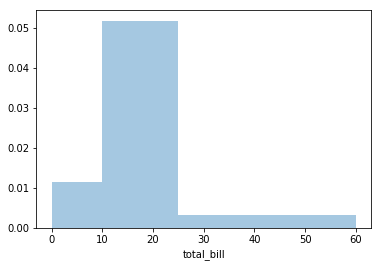

In [7]:
seaborn.distplot(tips.total_bill, bins = [0, 10, 25, 60], norm_hist = True, kde = False)

C'est la fonction `boxplot()` qui nous permet de réaliser une boîte à moustache (soit verticale en mettant la variable en `y`, soit horizontale en la mettant en `x`).

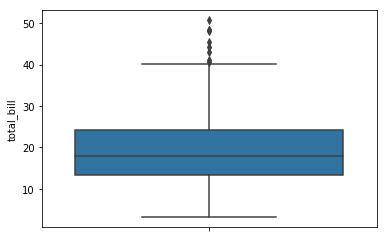

In [8]:
seaborn.boxplot(y = "total_bill", data = tips)

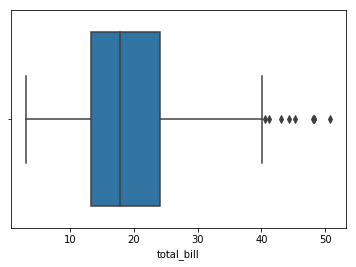

In [9]:
seaborn.boxplot(x = "total_bill", data=tips)

Une autre représentation possible est obtenue avec la fonction `pointplot()`, qui représente la moyenne et l'écarte-type, avec le choix entre vertical (`y`) ou horizontal (`x`).

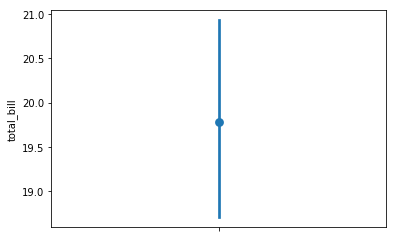

In [10]:
seaborn.pointplot(y = "total_bill", data = tips)

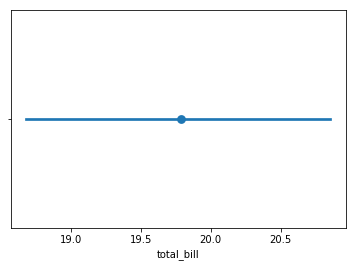

In [11]:
seaborn.pointplot(x = "total_bill", data = tips)

Un autre graphique possible est celui obtenu avec `violinplot()`, qui représente la densité d'une variable, toujours avec le choix vertical/horizontale (`y`/`x`).

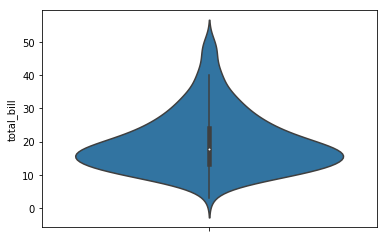

In [12]:
seaborn.violinplot(y = "total_bill", data = tips)

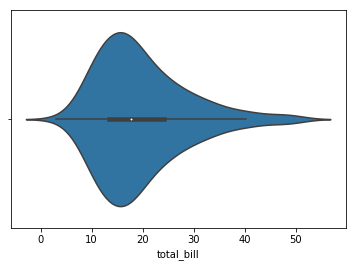

In [13]:
seaborn.violinplot(x = "total_bill", data = tips)

Enfin, il est possible de représenter toutes les valeurs sur un *pseudo* nuage de points. Avec `striplot()` dont l'option `jitter` a été activée, les points sont aléatoirement répartis sur l'axe des $x$ (si on utilise `y` - inversement sinon).

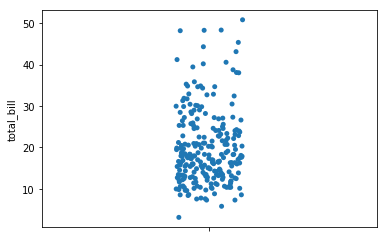

In [14]:
seaborn.stripplot(y = "total_bill", data = tips, jitter = True)

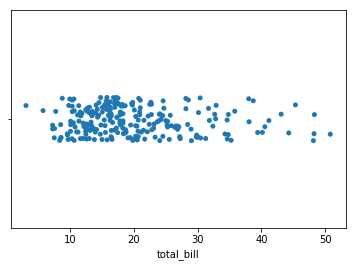

In [15]:
seaborn.stripplot(x = "total_bill", data = tips, jitter = True)

La fonction `factorplot()` regroupe l'ensemble des graphiques précédents (sauf l'histogramme) en une seule fonction. On accède aux différentes sous-fonctions en indiquant dans le paramètre `kind` :

- `point` : moyenne +/- écart-type
- `box` : boîte à moustaches
- `violin` : denisté (en symétrie)
- `strip` : *pseudo* nuage de points

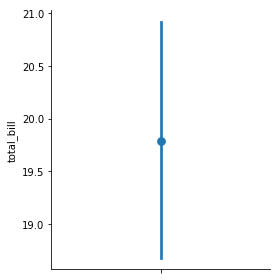

In [16]:
seaborn.factorplot(y = "total_bill", data = tips, kind = "point")

### Variable qualitative

Le diagramme en barres en effectifs est obtenu via la fonction `countplot()`. Il est soit horizontal (avec la variable en `x`), soit vertical (en `y`).

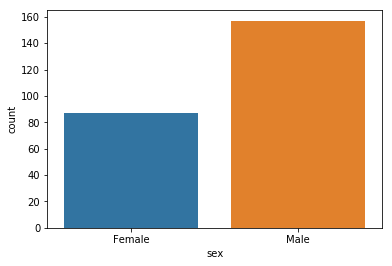

In [17]:
seaborn.countplot(x = "sex", data = tips)

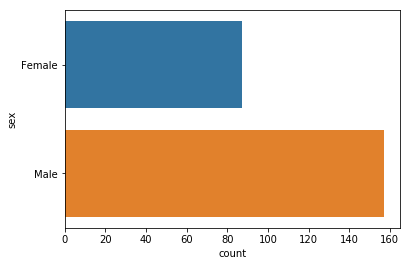

In [18]:
seaborn.countplot(y = "sex", data = tips)

Pour avoir la version en pourcentages (ou en proportions) de ce graphique, nous devons utiliser la fonction `barplot()`, sur la table de proportions calculée avant. Cette fonction réalise un calcul (moyenne par défaut) sur une variable (ici `freq`) en fonction des modalités d'une autre variable (`sex` ici donc).

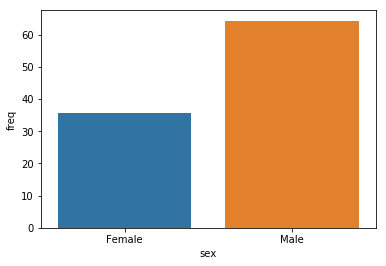

In [19]:
t = pandas.crosstab(tips.sex, "freq", normalize=True)
t = t.assign(sex = t.index, freq = 100 * t.freq)
seaborn.barplot(x = "sex", y = "freq", data = t)

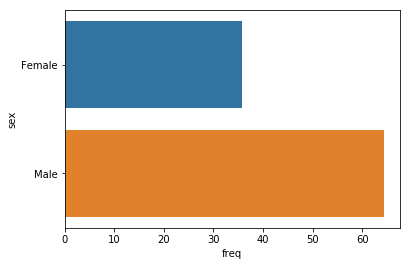

In [20]:
seaborn.barplot(x = "freq", y = "sex", data = t)

Pour réaliser un diagramme en barres empilées, il faudra le créer soi-même. Nous ne verrons pas ici.

Enfin, comme précédemment, la fonction `factorplot()` nous permet d'accéder aux sous-fonctions avec le choix dans `kind`.

- `count` : diagramme en barres (dénombrement)
- `bar` : diagramme en barres avec calcul

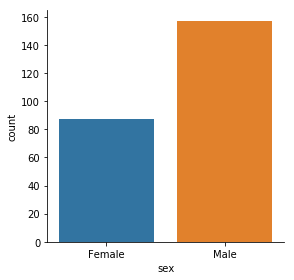

In [21]:
seaborn.factorplot(x = "sex", data = tips, kind = "count")

### Var quantitative - Var quantitative

Pour réaliser le nuage de points, on utilise la fonction `jointplot()`. Elle a l'avantage d'ajouter par défaut les histogrammes de chaque variable. Elle réalise par défaut le nuage de points simple (`scatter`). Comme pour `factorplot()`, on va pouvoir choisir le type de graphique avec le paramètre `kind`.

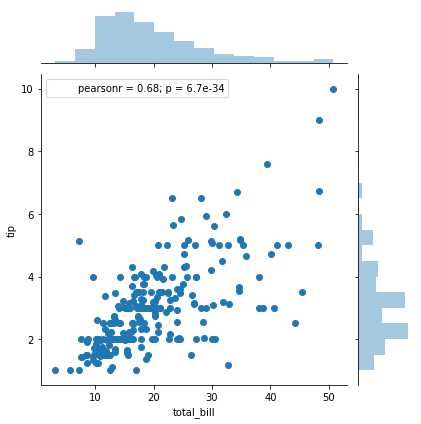

In [22]:
seaborn.jointplot(x = "total_bill", y = "tip", data = tips)

En choississant le type `reg`, on obtient en plus l'ajustement linéaire de la variable en `y` par celle en `x`.

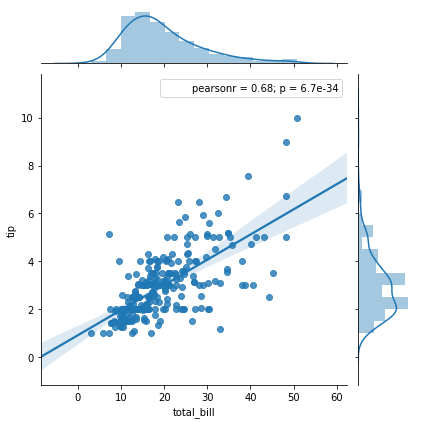

In [23]:
seaborn.jointplot(x = "total_bill", y = "tip", data = tips, kind = "reg")

On peut obtenir une *heatmap*, non pas avec des rectangles mais un pavage hexagonal, avec `kind = "hex"`.

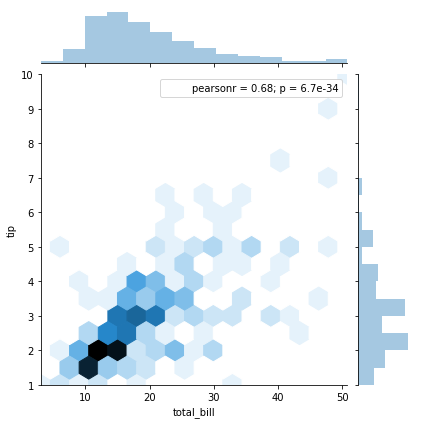

In [24]:
seaborn.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex")

Enfin, on peut avoir une estimation de la densité en 2d avec le type `kde`.

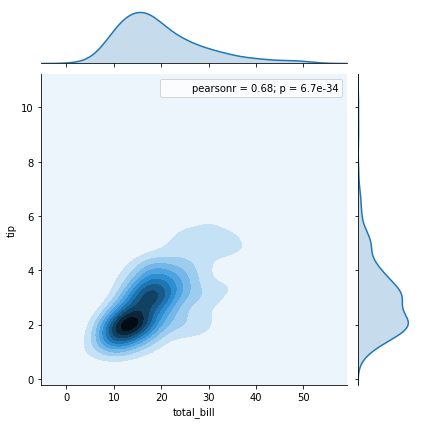

In [25]:
seaborn.jointplot(x = "total_bill", y = "tip", data = tips, kind = "kde")

Si on souhaite ne pas avoir les distributions marginales, la fonction `regplot()` nous permet de réaliser le nuage de points avec ou sans ajustement (paramètre `fit_reg`). On peut aussi n'afficher que l'ajustement.

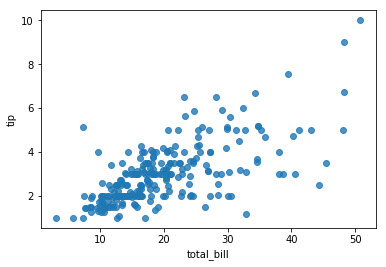

In [26]:
seaborn.regplot("total_bill", "tip", data = tips, fit_reg = False)

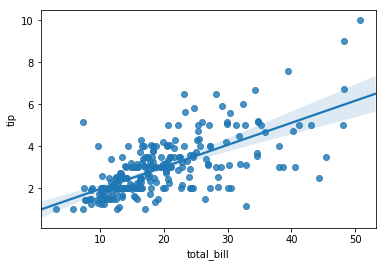

In [27]:
seaborn.regplot("total_bill", "tip", data = tips)

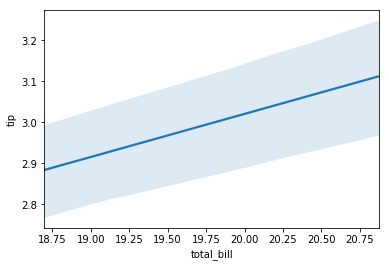

In [28]:
seaborn.regplot("total_bill", "tip", data = tips, scatter = False)

Il est possible d'obtenir directement tous les nuages de points 2 à 2, avec la fonction `pairplot()`. Le paramètre `vars` permet de sélectionner certaines variables. Par défaut, la fonction utilise toutes les variables numériques.

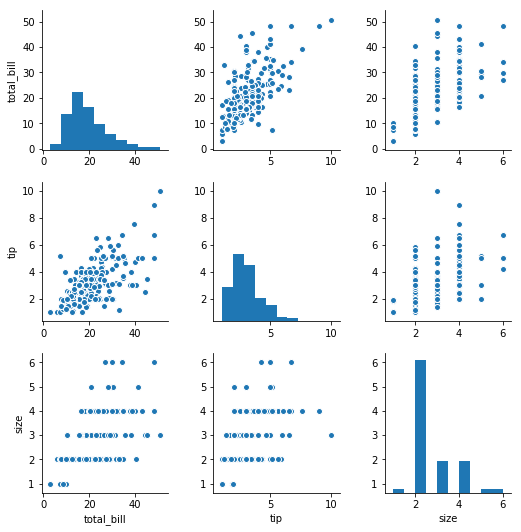

In [29]:
seaborn.pairplot(data = tips, vars = ["total_bill", "tip", "size"])

### Var qualitative - Var qualitative

Pour obtenir le diagramme en barres séparées (en effectifs), nous utilisons la fonction `factorplot()` avec le paramètre `hue` (celui-ci provient de la fonction `countplot()`).

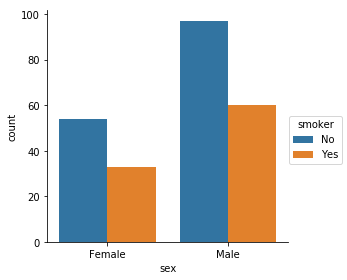

In [30]:
seaborn.factorplot(x = "sex", hue = "smoker", data = tips, kind = "count")

Cette fonction `factorplot()` permet aussi un découpage en facette avec les paramètres `row` et `col`. Ici, nous découpons donc le graphique en fonction des modalités de `smoker`.

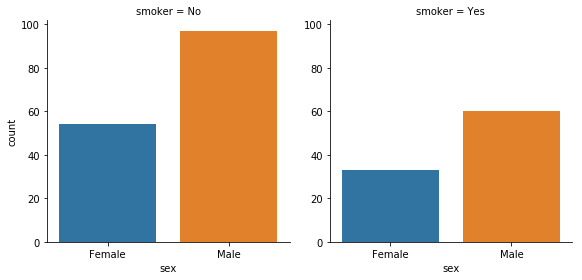

In [31]:
seaborn.factorplot(x = "sex", col = "smoker", data = tips, kind = "count")

Pour avoir la version en pourcentages, il faut faire les calculs avant, modifier la structure du résultat et les afficher ensuite.

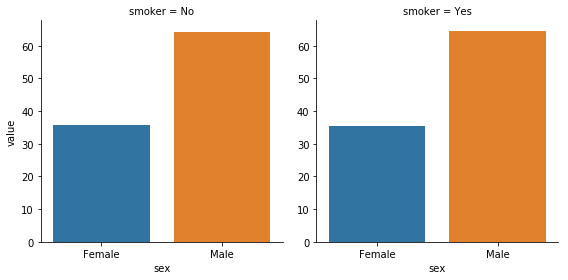

In [32]:
t = pandas.crosstab(tips.sex, tips.smoker, normalize = "columns")
t = t.assign(sex = t.index)
tm = pandas.melt(t, id_vars = "sex")
tm = tm.assign(value = 100 * tm.value)

seaborn.factorplot("sex", y = "value", col = "smoker", data = tm, kind = "bar")

Une autre représentation est de visualiser la table de contingence avec une *heatmap* (la couleur dépendra du nombre d'individus pour chaque couple de modalité).

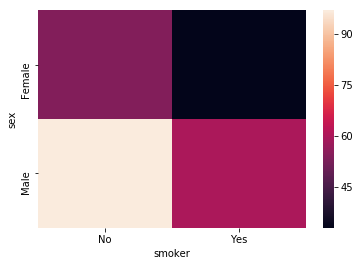

In [33]:
seaborn.heatmap(pandas.crosstab(tips.sex, tips.smoker))

### Var quantitative - Var qualitative

Pour réaliser les histogrammes de la variable quantitative pour chaque modalité de la variable qualitative, il faut passer par la fonction `FacetGrid()`, permettant de faire un découpage en plusieurs lignes (avec `row`) et/ou en plusieurs colonnes (avec `col`). On applique ensuite la fonction `distplot()` avec les paramètres (ici la variable `total_bill`).

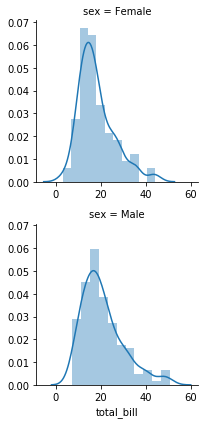

In [34]:
p = seaborn.FacetGrid(tips, row = "sex")
p.map(seaborn.distplot, "total_bill")

Les boîtes à moustaches sont elles faciles à créer avec `factorplot()` (ou `boxplot()` directement).

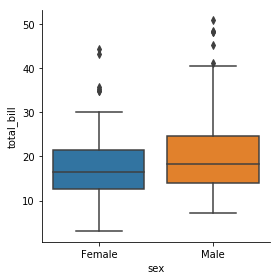

In [35]:
seaborn.factorplot(x = "sex", y = "total_bill", data = tips, kind = "box")

On peut aussi représenter la moyenne et l'écart-type à l'aide du graphique `pointplot`.

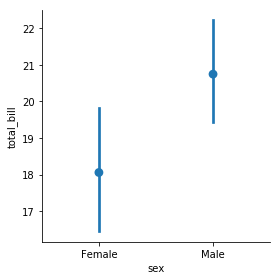

In [36]:
seaborn.factorplot(x = "sex", y = "total_bill", data = tips, kind = "point", join = False)

Le graphique `violinplot` est bien sûr lui aussi applicable dans ce cas.

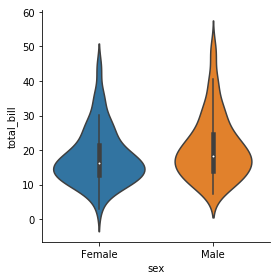

In [37]:
seaborn.factorplot(x = "sex", y = "total_bill", data = tips, kind = "violin")

On a aussi la possibilité de représenter le *pseudo* nuage de points, avec `stripplot` (avec `jitter` à `True`.

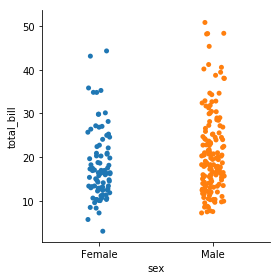

In [38]:
seaborn.factorplot(x = "sex", y = "total_bill", data = tips, kind = "strip", jitter = True)

## Multivariables

#### 3 quantitatives

Dans ce cas, nous cherchons à faire une *heatmap* du croisement entre les versions discrétisées en intervalles de deux variables quantitatives, la couleur d'un rectangle dépendant de la moyenne (ici `mean` du module `numpy`) d'une troisième variable. On créé la table puis l'affiche.

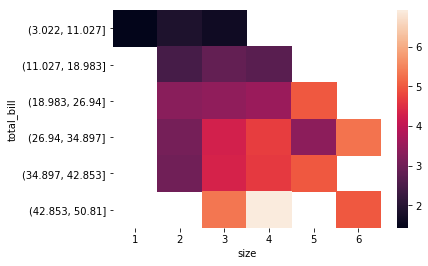

In [39]:
t = pandas.crosstab(pandas.cut(tips.total_bill, bins = 6),
                    tips["size"],
                    values = tips.tip, aggfunc = numpy.mean)
seaborn.heatmap(t)

#### 2 quantitatives et 1 qualitative

Dans ce cas, il est possible de faire le nuage de points avec la fonction `lmplot()`, en utilisant le principe de grille (comme `factorplot()`) avec un découpage en colonnes (via `col`). On peut aussi améliorer la distinction en ajoutant une couleur différente sur la variable `sex` avec le paramètre `hue`.

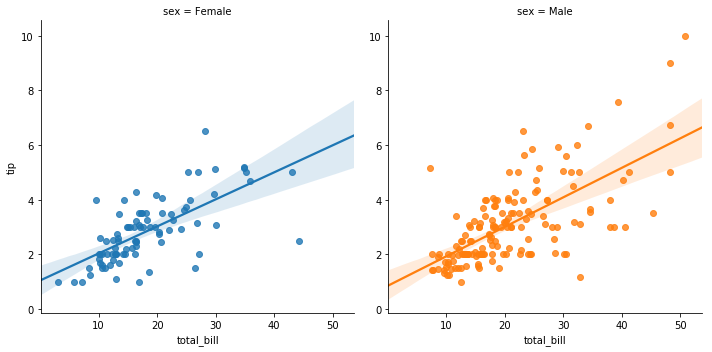

In [40]:
seaborn.lmplot("total_bill", "tip", hue = "sex", col = "sex", data = tips)

#### 1 quantitative et 2 qualitatives

Il est possible de créer les histogrammes de la variable quantitative pour chaque couple de modalités sur les deux variables qualitatives avec `FacetGrid()`.

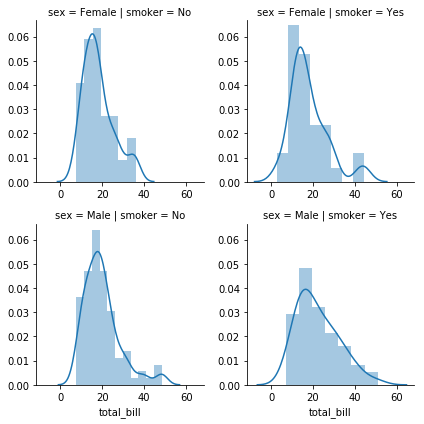

In [41]:
p = seaborn.FacetGrid(tips, row = "sex", col = "smoker")
p.map(seaborn.distplot, "total_bill")

Pour les boîtes à moustaches, on utilise la fonction `factorplot()` qui permet d'ajouter une couleur en fonction d'une variable qualitative via le paramètre `hue`.

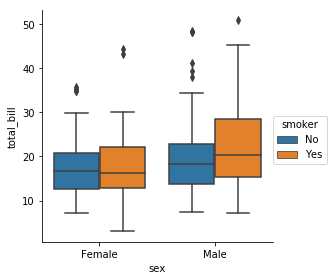

In [42]:
seaborn.factorplot(x = "sex", y = "total_bill", hue = "smoker", data = tips, kind = "box")

Cette même fonction `factorplot()` permet le découpage en lignes (`row`) ou en colonnes (`col`), qui nous est utile pour le graphique `point`.

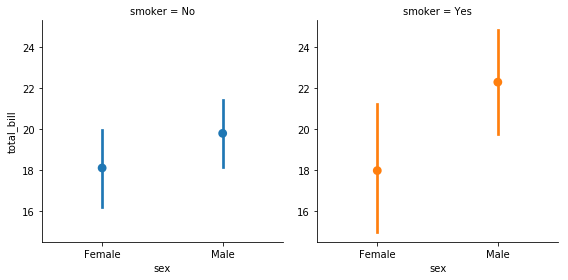

In [43]:
seaborn.factorplot(x = "sex", y = "total_bill", hue = "smoker", col = "smoker", data = tips, 
                   kind = "point", join = False)

Le graphique `violin` s fait lui très facilement.

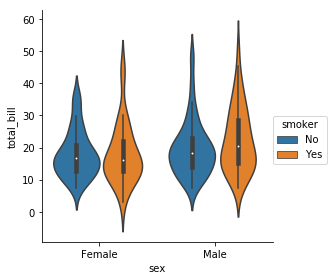

In [44]:
seaborn.factorplot(x = "sex", y = "total_bill", hue = "smoker", data = tips, kind = "violin")

Et pour le graphique `strip`, on reprend le découpage via `col`.

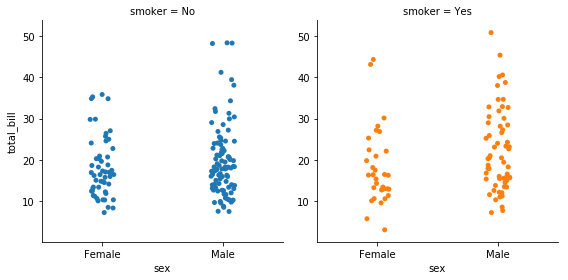

In [45]:
seaborn.factorplot(x = "sex", y = "total_bill", hue = "smoker", col = "smoker", data = tips, 
                   kind = "strip", jitter = True)

#### 3 qualitatives

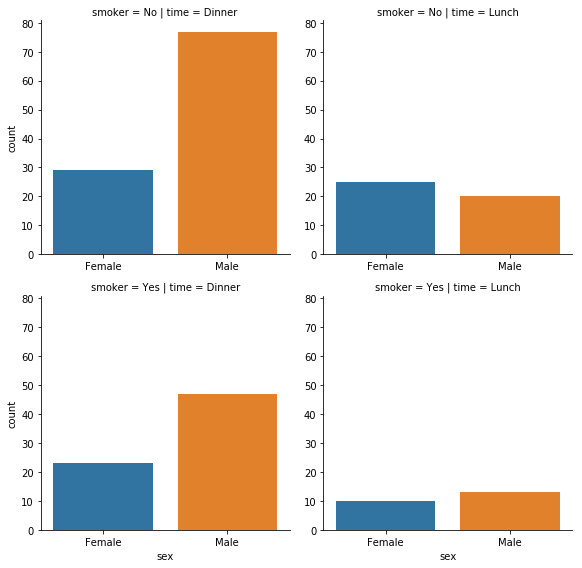

In [46]:
seaborn.factorplot(x = "sex", row = "smoker", col = "time", data = tips, kind = "count")

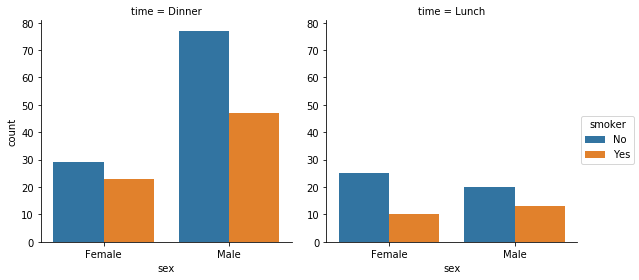

In [47]:
seaborn.factorplot(x = "sex", hue = "smoker", col = "time", data = tips, kind = "count")

Pour avoir la version sommée à 100%, il faut calculer la table en premier, la restructurer et l'afficher.

In [48]:
t = pandas.crosstab([tips.smoker, tips.time], tips.sex, normalize = "index")
t = t.assign(smoker_time = t.index)
tm = pandas.melt(t, id_vars="smoker_time")
tm = tm.assign(value = 100 * tm.value)

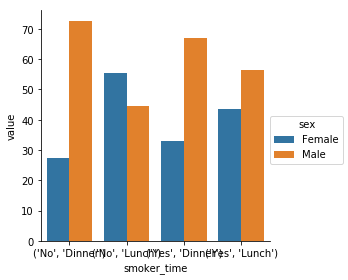

In [49]:
seaborn.factorplot(x = "smoker_time", y = "value", hue = "sex", data = tm, 
                   kind = "bar")

### Compléments

Il est bien évidemment possible de personnaliser le graphique de différentes façons, dont certains sont présentées ci-dessous. On accède aux fonctions de personnalisation soit via des paramètres de la fonction, soit via l'objet renvoyé par la fonction utilisée pour créer le graphique, soit via le module directement. Dans ce cas, ce sont des changements qui affecteront aussi les graphiques futurs.

- `suptitle` dans `fig` : titre global
- `set_axis_labels` : titre des axes
- `palette` : choix d'une palette de couleurs 
- `size` et `aspect` : hauteur et ratio entre hauteur et largeur, pour chaque facette (une seule ici)

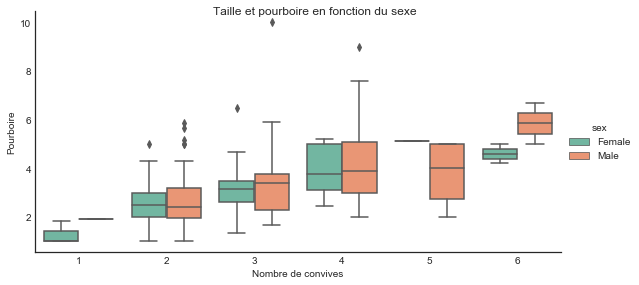

In [50]:
seaborn.set_style("white")
p = seaborn.factorplot(x = "size", y = "tip", hue = "sex", data = tips, kind = "box",
                      palette = "Set2", size = 4, aspect = 2)
p.fig.suptitle("Taille et pourboire en fonction du sexe")
p.set_axis_labels("Nombre de convives", "Pourboire")


## A faire 



A partir du jeu de données [`Computers`](Computers.csv), vous devez répondre aux questions suivantes, avec `seaborn`. 

In [53]:
ordis = pandas.read_csv("Computers.csv")
ordis.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


1. Représenter graphiquement la variable `price` (histogramme, boîte à moustaches, ...)
1. Représenter le lien entre la variable `price` et les variables
    - `speed`
    - `hd`
    - `ram`
    - `cd`
    - `premium`
    - `screen`
1. Représenter sur `price` l'impact de ces couples de variables
    - `speed` et `hd`
    - `hd` et `screen`
    - `speed` et `premium`
    - `hd` et `premium`
1. Proposer des représentations graphiques, toujours pour décrire `price` en fonction d'autres variables, mais prenant en compte plus de trois variables

### `anscombe`

Représenter sur un même graphique (avec un découpage donc) les quatre séries des données [`anscombe`](anscombe.csv), avec `seaborn`. L'idée est dobtenir un graphique de ce [type](https://fr.wikipedia.org/wiki/Quartet_d%27Anscombe#/media/File:Anscombe.svg).

In [54]:
anscombe = pandas.read_csv("anscombe.csv")
anscombe

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91
